In [1]:
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage
from langgraph.graph.message import MessagesState
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from pprint import pprint

from IPython.display import display, Image

In [2]:
import os
os.environ['OPENAI_API_KEY'] = "<YOUR OPENAI API KEY HERE"

from tavily import TavilyClient
# Initialize the Tavily client
tavily = TavilyClient(api_key="<YOUR TAVILY API KEY HERE")

In [3]:
def subtract(a, b):
    '''
    this function will subtract the second no. from first no. and return the result
    '''
    return a - b

#define tools
tools = [subtract, tavily.search]

In [4]:
#create the model
model = ChatOpenAI(model = 'gpt-3.5-turbo')

#bind the tools with the model
llm_with_tools = model.bind_tools(tools)

In [5]:
#create the llm node
def llm_node(state:MessagesState):
    return {'messages':[llm_with_tools.invoke(state['messages'])]}

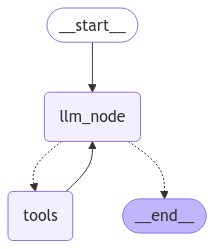

In [6]:
#create graph
builder = StateGraph(MessagesState)
builder.add_node('llm_node',llm_node)
builder.add_node('tools',ToolNode(tools))

builder.add_edge(START,'llm_node')
builder.add_conditional_edges('llm_node',tools_condition)
builder.add_edge('tools','llm_node')

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
messages = [HumanMessage(content="Who had a higher batting average in test cricket - Sachin Tendulkar or Brian Lara?")]
messages = graph.invoke({"messages": messages})

from pprint import pprint
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Who had a higher batting average in test cricket - Sachin Tendulkar or Brian Lara?
================================== Ai Message ==================================
Tool Calls:
  search (call_wEk4vCyYIyMmvzloVSg1Jyk6)
 Call ID: call_wEk4vCyYIyMmvzloVSg1Jyk6
  Args:
    query: Sachin Tendulkar test cricket batting average
    max_results: 1
================================= Tool Message =================================
Name: search

{"query": "Sachin Tendulkar test cricket batting average", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Sachin Tendulkar | Detailed Test Batting Stats - Stat Sensei", "url": "https://statsensei.com/sachin-tendulkar-test-stats/", "content": "Analysis of the Sachin Tendulkar's test batting statistics including his runs, ave, SR, top scores, record away from home, at home, outside Asia and in Asia. Skip to content. Menu. Menu. Home; All Time. .